In [400]:
import os
import sys
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.signal
import scipy.stats

from importlib import reload
import dill
import scipy.special
import scipy.signal
import scipy.optimize
import timeit 

import island_evo_simulation_methods as ie
reload(ie)

from IPython.display import display, Math

def mathprint(string):
    return display(Math(string))

# reload(ml)

%matplotlib inline

font = {'family' : 'serif',
        'size'   : 16}
text = {'usetex' : True}

plt.rc('font', **font)
plt.rc('text',**text)
plt.rc('axes', titlesize=18)

In [410]:
K = 300
D = 10
m = 1e-5
gamma = -0.8
thresh = -40
invasion_freq = 1/K
dt = 0.1
sample_num = 5
mu = 0
seed = 0
epoch_timescale = 10
epoch_num = 0
corr_mut = 0
sig_S = 0
epochs_to_save_traj = 0
long_epochs = [2]
long_factor = 3
file_name = 'islands_evo_test'


ie.IslandsEvo(file_name, D, K, m, gamma, thresh, invasion_freq, dt, mu, seed, epoch_timescale, epoch_num,
                 sample_num, corr_mut=corr_mut, sig_S = sig_S)

0


In [411]:
data = np.load(file_name+'.npz')
data = data['data'].item()

In [403]:
data['n_traj_dict']

{}

In [404]:
n_traj = data['n_traj_dict'][-1]
K = n_traj.shape[0]
for ii in range(K):
    plt.plot(n_traj[ii,:])
    
plt.yscale('log')

KeyError: -1

In [420]:
keys = list(data.keys())
keys.sort()
print(keys)

['D', 'K0', 'K_tot', 'N', 'S', 'S_full', 'S_init', 'S_mean_ave_list', 'S_mean_std_list', 'V', 'V_dict', 'V_init', 'corr_mut', 'count_short', 'current_species_idx', 'dt', 'dt_list', 'epoch_num', 'epoch_time_list', 'epoch_timescale', 'epochs_to_save_traj', 'file_name', 'force_mean_ave_list', 'force_mean_std_list', 'gamma', 'invasion_criteria_memory', 'invasion_eig_buffer', 'invasion_eigs', 'invasion_eigs_list', 'invasion_freq', 'invasion_rejects_list', 'invasion_species_idx', 'invasion_success', 'invasion_success_list', 'lambda_mean_array', 'lambda_mean_ave_list', 'lambda_mean_std_list', 'long_epochs', 'long_factor', 'm', 'mu', 'n0', 'n2_mean_array', 'n2_mean_ave_list', 'n2_mean_std_list', 'n_init', 'n_init_list', 'n_mean_array', 'n_mean_ave_list', 'n_mean_std_list', 'n_traj_dict', 'parent_idx_dict', 'sample_num', 'seed', 'sig_S', 'sim_end_time', 'sim_start_time', 'starting_species_idx_list', 'surviving_bool_list', 'thresh']


In [427]:
time = data['epoch_time_list'][0]
dt = data['dt_list'][0]
steps = time/dt
steps

2548.0

In [425]:
data['dt_list']

[0.588539681527983]

In [414]:
[len(n_mean) for n_mean in data['n_mean_ave_list']]

[300]

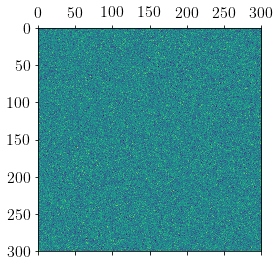

In [415]:
K_tot = data['K_tot']
V_dict = data['V_dict']
V = np.zeros((K_tot,K_tot))
for ii in range(K_tot):
    for jj in range(K_tot):
        V[ii,jj] = V_dict.get((ii,jj),np.nan)
plt.matshow(V)

In [416]:
data['invasion_eigs_list']

[]

In [417]:
data['invasion_success_list']

[]

In [388]:
data['epoch_time_list']

[460.31864494410917,
 352.56725945312996,
 1031.6077101780465,
 302.2692169771995,
 298.762830252016,
 302.2692169771995]

In [319]:
data['']

196680

In [315]:
list(V_dict.values()).__sizeof__()

28680

In [318]:
np.zeros((data['K_tot'],data['K_tot']),dtype=np.float64).nbytes

69192

In [323]:
3 in []

False

In [328]:
a = []
a.extend(np.array([3.1,4,5]))

In [333]:
g = -1
cov_mat = [[1.,g],[g,1.]]
z_mat = np.random.multivariate_normal([0,0],cov=cov_mat,size=10)
z_mat

array([[-1.33531628,  1.33531628],
       [-0.42490266,  0.42490268],
       [-0.19832706,  0.19832705],
       [-0.52678171,  0.5267817 ],
       [ 0.38864298, -0.38864297],
       [ 0.17908241, -0.1790824 ],
       [-1.61045898,  1.61045898],
       [ 0.10243704, -0.10243703],
       [ 0.07033962, -0.07033962],
       [-1.01144789,  1.01144789]])

In [337]:
a = list(range(10))
np.array(a)==3

array([False, False, False,  True, False, False, False, False, False,
       False])

In [340]:
b = np.arange(10)
b[-11:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])